In [1]:
import importlib
import numpy as np
from scipy import stats
from tabulate import tabulate
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import matplotlib

from plotnine import ggplot, aes, geom_bar, theme_classic, guides
from plotnine.scales import xlim, ylim
from plotnine.labels import xlab, ylab, ggtitle
import plotnine
import patchworklib as pw

plt.rcParams.update({'font.size': 16})

<Figure size 72x72 with 0 Axes>

In [2]:
def load_data(file_dir, file_name, data_preprocessor_name):
    # load raw data
    data = pd.read_csv(file_dir + file_name)
    # preprocess data
    data_preprocessor = importlib.import_module(data_preprocessor_name)
    preprocessed_data = data_preprocessor.preprocess(data)
    return preprocessed_data

def punish_bar_plot(df, x_name, y_name, y_lim, xlabel, ylabel, title='', hue_name=None, fig_size=(3,4), fill_color='darkred'):
    if hue_name is None:
        sns.barplot(x=x_name, y=y_name,
                   data=df, color=fill_color)
    else:
        sns.barplot(x=x_name, y=y_name, hue=hue_name,
                   data=df)
    plt.ylim(y_lim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

## Jordan & Rand, 2020

In [3]:
file_dir = 'data/Jordan_Rand_2020/'
file_name = 'all_data.csv'
data_preprocessor_name = 'data.Jordan_Rand_2020.preprocess'

In [4]:
real_data = load_data(file_dir, file_name, data_preprocessor_name)
real_data

,IV,condition,punish_prob,punish_prob_se
0,Punishment-only,Private/Unspecified,0.326667,0.006362
1,Punishment-only,Observed,0.393357,0.006626
2,Helping+Punishment,Private/Unspecified,0.262267,0.005967
3,Helping+Punishment,Observed,0.255773,0.005918


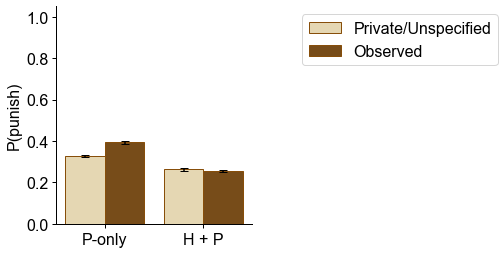

In [5]:
color_palette = sns.color_palette("BrBG", 10)
palette ={"Private/Unspecified": color_palette[3], "Observed": color_palette[0]}

plt.figure(figsize=(3.5,4), facecolor='white')
ax = sns.barplot(x='IV', y='punish_prob', hue='condition', 
                 data=real_data, palette=palette)
plt.ylim([0,1.05])
plt.xlabel("")
ax.set(xticklabels=['P-only', 'H + P'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("P(punish)")
for patch in ax.patches:
    patch.set_edgecolor(color_palette[0])
for patch, se in zip(ax.patches, real_data['punish_prob_se']):
    plt.errorbar(patch.get_x() + patch.get_width()/2, patch.get_height(), yerr=se, 
                 color='black', capsize=4)
plt.legend(title="", bbox_to_anchor=(2.00, 0.9, 0.3, 0.1), loc='best')
    
plt.savefig(f"results/data_figures/Jordan_Rand_2020_HP_Ponly2.png", dpi=1000, bbox_inches='tight')
plt.show()

## Batistoni et al., 2021

In [6]:
file_dir = 'data/Batistoni_2021/'
file_name = 'all_data.csv'
data_preprocessor_name = 'data.Batistoni_2021.preprocess'

In [7]:
real_data = load_data(file_dir, file_name, data_preprocessor_name)
real_data

,IV,condition,punish_prob,punish_prob_se,punish_severity,punish_severity_se
0,Punishment,Private/Anonymous,0.471947,0.016622,43.868741,0.756982
1,Punishment,Public/Observed,0.597938,0.016326,48.313908,0.853861


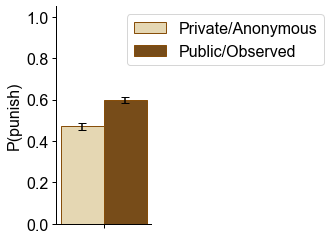

In [8]:
color_palette = sns.color_palette("BrBG", 10)
palette ={"Private/Anonymous": color_palette[3], "Public/Observed": color_palette[0]}

plt.figure(figsize=(1.7,4), facecolor='white')
ax = sns.barplot(x='IV', y='punish_prob', hue='condition', 
                 data=real_data, palette=palette)
plt.ylim([0,1.05])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("")
ax.set(xticklabels=[])
plt.ylabel("P(punish)")
for patch in ax.patches:
    patch.set_edgecolor(color_palette[0])
for patch, se in zip(ax.patches, real_data['punish_prob_se']):
    plt.errorbar(patch.get_x() + patch.get_width()/2, patch.get_height(), yerr=se, 
                 color='black', capsize=4)
plt.legend(title="", bbox_to_anchor=(2.60, 0.9, 0.3, 0.1), loc='best')
    
plt.savefig(f"results/data_figures/Batistoni_2021_punish_prob.png", dpi=1000, bbox_inches='tight')
plt.show()

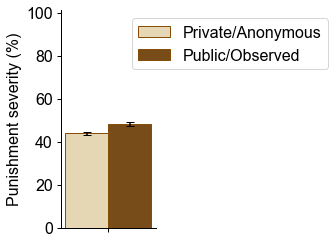

In [9]:
plt.figure(figsize=(1.7,4), facecolor='white')
ax = sns.barplot(x='IV', y='punish_severity', hue='condition', 
                 data=real_data, palette=palette)
plt.ylim([0,101])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("")
ax.set(xticklabels=[])
plt.ylabel("Punishment severity (%)")
for patch in ax.patches:
    patch.set_edgecolor(color_palette[0])
plt.legend(title="", bbox_to_anchor=(2.60, 0.9, 0.3, 0.1), loc='best')
for patch, se in zip(ax.patches, real_data['punish_severity_se']):
    plt.errorbar(patch.get_x() + patch.get_width()/2, patch.get_height(), yerr=se, 
                 color='black', capsize=4)
    
plt.savefig(f"results/data_figures/Batistoni_2021_punish_severity.png", dpi=1000, bbox_inches='tight')
plt.show()

In [10]:
file_dir = 'data/Batistoni_2021/'
file_name = 'all_data.csv'
data_preprocessor_name = 'data.Batistoni_2021.preprocess_severity'

In [11]:
real_data = load_data(file_dir, file_name, data_preprocessor_name)
real_data

,IV,condition,punish_prob,punish_prob_se
0,0-10,Private/Anonymous,0.534653,0.028655
1,10-20,Private/Anonymous,0.049505,0.012462
2,20-30,Private/Anonymous,0.072607,0.014907
3,30-40,Private/Anonymous,0.042904,0.011641
4,40-50,Private/Anonymous,0.128713,0.019238
5,50-60,Private/Anonymous,0.122112,0.018810
6,60-70,Private/Anonymous,0.006601,0.004652
7,70-80,Private/Anonymous,0.003300,0.003295
8,80-90,Private/Anonymous,0.006601,0.004652
9,90-100,Private/Anonymous,0.000000,0.000000


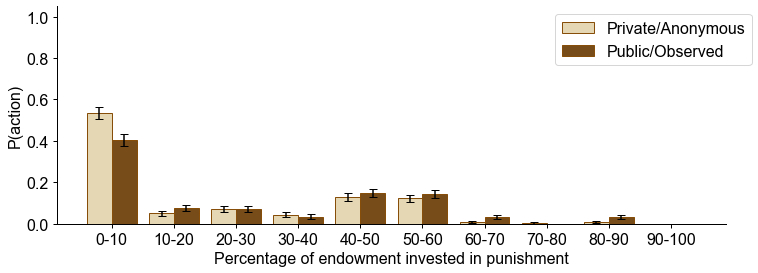

In [12]:
color_palette = sns.color_palette("BrBG", 10)
palette ={"Private/Anonymous": color_palette[3], "Public/Observed": color_palette[0]}

plt.figure(figsize=(12,4), facecolor='white')
ax = sns.barplot(x='IV', y='punish_prob', hue='condition', 
                 data=real_data, palette=palette)
plt.ylim([0,1.05])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Percentage of endowment invested in punishment")
plt.ylabel("P(action)")
for patch in ax.patches:
    patch.set_edgecolor(color_palette[0])
plt.legend(title="", bbox_to_anchor=(0.75, 0.9, 0.3, 0.1), loc='best')
for patch, se in zip(ax.patches, real_data['punish_prob_se']):
    plt.errorbar(patch.get_x() + patch.get_width()/2, patch.get_height(), yerr=se, 
                 color='black', capsize=4)

plt.savefig(f"results/data_figures/Batistoni_2021_punish_severity2.png", dpi=1000, bbox_inches='tight')
plt.show()

## Rai, 2021

In [13]:
file_dir = 'data/Rai_2021/'
file_name = 'exp1_data.csv'
data_preprocessor_name = 'data.Rai_2021.preprocess'

In [14]:
real_data = load_data(file_dir, file_name, data_preprocessor_name)
real_data

,IV,punish_prob,punish_prob_se
0,No-gain,0.71,0.045376
1,Small-gain,0.38,0.049411


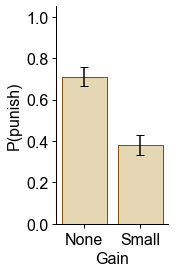

In [15]:
color_palette = sns.color_palette("BrBG", 10)
plt.figure(figsize=(2,4), facecolor='white')
ax = sns.barplot(x='IV', y='punish_prob', 
                 data=real_data, color=color_palette[3])
plt.ylim([0,1.05])
ax.set_xticklabels(['None', 'Small'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Gain")
plt.ylabel("P(punish)")
for patch in ax.patches:
    patch.set_edgecolor(color_palette[0])
for patch, se in zip(ax.patches, real_data['punish_prob_se']):
    plt.errorbar(patch.get_x() + patch.get_width()/2, patch.get_height(), yerr=se, 
                 color='black', capsize=4)
    
plt.savefig(f"results/data_figures/Rai_2021_study1.png", dpi=1000, bbox_inches='tight')
plt.show()

In [16]:
file_dir = 'data/Rai_2021/'
file_name = 'exp3a_data.csv'
data_preprocessor_name = 'data.Rai_2021.preprocess'

In [17]:
real_data = load_data(file_dir, file_name, data_preprocessor_name)
real_data

,IV,punish_willingness,punish_willingness_se
0,No-gain,5.58,0.119197
1,Small-gain,4.70,0.143963
2,Large-gain,5.59,0.131928


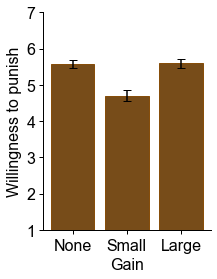

In [18]:
color_palette = sns.color_palette("BrBG", 10)
plt.figure(figsize=(3,4), facecolor='white')
ax = sns.barplot(x='IV', y='punish_willingness', 
                 data=real_data, color=color_palette[0])
plt.ylim([1,7])
ax.set_xticklabels(['None', 'Small', 'Large'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Gain")
plt.ylabel("Willingness to punish")
for patch in ax.patches:
    patch.set_edgecolor(color_palette[0])
for patch, se in zip(ax.patches, real_data['punish_willingness_se']):
    plt.errorbar(patch.get_x() + patch.get_width()/2, patch.get_height(), yerr=se, 
                 color='black', capsize=4)

plt.savefig(f"results/data_figures/Rai_2021_study3a.png", dpi=1000, bbox_inches='tight')
plt.show()